In [1]:
from lsa import *
import matplotlib.pyplot as plt

In [2]:
data_dir = 'data'

In [3]:
data_files = [os.path.join(data_dir, f) for f in DATA_FILES]

In [4]:
df_data = load_data(data_files)

In [16]:
df_data

,title,author,url,content,id,publication,tokens
0,It’s Possible to Hack a Phone With Sound Waves...,John Markoff,NaN,SAN FRANCISCO — A security loophole that wo...,19284,New York Times,"[san, francisco, secur, loophol, would, allow,..."
1,Politically Correct School Officials Reject ’G...,Tom Ciccotta,NaN,A report from The Baltimore Sun claims that Ba...,44077,Breitbart,"[report, baltimor, sun, claim, baltimor, count..."
2,"Clinton, Sanders use N.H. primary to frame lon...",Philip Rucker,https://web.archive.org/web/20160206013008/htt...,"CONCORD, N. H. — For the Democratic presi...",209714,Washington Post,"[concord, n, h, democrat, presidenti, candid, ..."
3,The ambitious Democrat who can make Trump Univ...,Charles Gasparino,http://nypost.com/2016/03/08/the-ambitious-dem...,Add one more bizarre twist to the 2016 preside...,135930,New York Post,"[add, one, bizarr, twist, 2016, presidenti, el..."
4,People Are Slamming Tribeca Film Festival For...,Susan Cheng,https://web.archive.org/web/20160325115729/htt...,Organizers for the upcoming 2016 Tribeca Film...,106460,Buzzfeed News,"[organ, upcom, 2016, tribeca, film, festiv, co..."
...,...,...,...,...,...,...,...
995,Autopsy shows Keith Lamont Scott had four guns...,Wesley Lowery,https://web.archive.org/web/20161013005231/htt...,Keith Lamont Scott was struck at least th...,215980,Washington Post,"[keith, lamont, scott, struck, least, three, t..."
996,Trump Names Prominent Climate Denier To His E...,Dan Vergano,https://web.archive.org/web/20161211105648/htt...,Donald Trump’s presidential transition team o...,113746,Buzzfeed News,"[donald, trump, presidenti, transit, team, fri..."
997,"As Abenomics struggles, Japan PM pushes ’equal...",Tetsushi Kajimoto,http://www.reuters.com/article/us-japan-econom...,When Fumiko Kasai returned to work a decade a...,189393,Reuters,"[fumiko, kasai, return, work, decad, ago, foun..."
998,Tonys 2016: all of the winners at the 70th ann...,Constance Grady,http://www.vox.com/2016/6/12/11915988/tony-awa...,"The 70th annual Tony Awards, honoring the bes...",200799,Vox,"[70th, annual, toni, award, honor, best, brigh..."


In [17]:
df_words = preprocess_docs(df_data, use_lemmatizer=False, remove_numbers=False)
df_frequency = get_term_by_document_frequency(df_words)
df_reduced = reduce_terms(df_frequency, max_df=1, min_df=1, max_terms=0,
                          keep_less_freq=False)
df_tf_idf = get_tf_idf(df_reduced)

In [18]:
df_tf_idf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
control,0.036560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
focus,0.004921,0.008054,0.003103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004621,NaN,NaN,NaN,0.003869,NaN,NaN,NaN,NaN
function,0.007847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virus,0.011030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lab,0.011747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
schweizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shameless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
levenson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
joni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
values = df_tf_idf.fillna(0).to_numpy()

In [20]:
values

array([[0.03656023, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0049209 , 0.00805421, 0.00310264, ..., 0.        , 0.        ,
        0.        ],
       [0.00784677, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [21]:
U, s_eigen, V = np.linalg.svd(values, full_matrices=False)

In [22]:
s_eigen

array([3.20515317e+00, 1.49983402e+00, 1.38945882e+00, 1.04753992e+00,
       9.24949835e-01, 8.11414323e-01, 7.52390600e-01, 7.17475753e-01,
       7.03109632e-01, 6.99342578e-01, 6.76973479e-01, 6.63348566e-01,
       6.60494164e-01, 6.47899404e-01, 6.37384140e-01, 6.32710979e-01,
       6.20696272e-01, 6.17619107e-01, 6.06613955e-01, 6.00028716e-01,
       5.89318468e-01, 5.88818467e-01, 5.86247311e-01, 5.84101484e-01,
       5.80574086e-01, 5.77643277e-01, 5.74392879e-01, 5.71501930e-01,
       5.68808871e-01, 5.66506002e-01, 5.61020258e-01, 5.56235080e-01,
       5.55482086e-01, 5.51086886e-01, 5.48056034e-01, 5.44227964e-01,
       5.42985058e-01, 5.39642904e-01, 5.37869433e-01, 5.33918378e-01,
       5.30844138e-01, 5.29173442e-01, 5.26903721e-01, 5.21993060e-01,
       5.17514007e-01, 5.14656405e-01, 5.13456891e-01, 5.09518682e-01,
       5.07324696e-01, 5.06184888e-01, 5.03241514e-01, 5.00847429e-01,
       5.00615319e-01, 4.98494663e-01, 4.98113433e-01, 4.96466915e-01,
      

In [23]:
s_eigen[0]

3.2051531735843146

In [24]:
s_eigen_norm = [x / s_eigen[0] for x in s_eigen]

In [25]:
s_eigen_norm

[1.0,
 0.46794456875634666,
 0.4335077755852758,
 0.32682991032598363,
 0.28858210045544264,
 0.2531592966913491,
 0.2347440385416209,
 0.2238506912153555,
 0.21936849641918807,
 0.21819318447978459,
 0.21121407991172683,
 0.2069631403525096,
 0.20607257368642837,
 0.202143039447615,
 0.19886230256724444,
 0.19740428770957086,
 0.19365572834542932,
 0.19269566020437845,
 0.1892620795711036,
 0.18720750108030715,
 0.18386592966256,
 0.18370993072387348,
 0.1829077361730534,
 0.18223824329147273,
 0.1811377037991125,
 0.18022329848879576,
 0.17920918226179458,
 0.17830721298699342,
 0.17746698538498604,
 0.17674849560026082,
 0.17503695688223525,
 0.1735439930292578,
 0.17330906063210272,
 0.17193776901172758,
 0.17099215049341596,
 0.1697978020506206,
 0.16941001840523942,
 0.16836727453373737,
 0.16781395589349613,
 0.16658123634893834,
 0.16562208080196492,
 0.16510082774285773,
 0.1643926803495494,
 0.16286056613542296,
 0.16146311237747818,
 0.1605715474173822,
 0.16019730196118329,

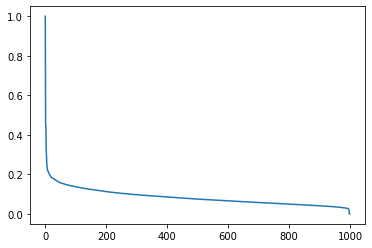

In [26]:
plt.plot(s_eigen_norm)